In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

print(df.shape)
df.head()

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [2]:
# Separate features and targets
# X = df.drop(columns=['Diabetes_binary'])
# y = df['Diabetes_binary']

In [3]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns = ['Diabetes_binary']), train['Diabetes_binary']
X_test, y_test = test.drop(columns = ['Diabetes_binary']), test['Diabetes_binary']
assert X_train.shape[0] == len(y_train)

In [21]:
# Fit random forest
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
# Evaluate RF on test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


pred_scores = model.predict_proba(X = X_test)[:, 1] # predicted probability of diabetes
pred_labels = model.predict(X = X_test) # predicted label of diabetes


acc_score = accuracy_score(y_true = y_test, y_pred = pred_labels)
pre_score = precision_score(y_true = y_test, y_pred = pred_labels)
rec_score = recall_score(y_true = y_test, y_pred = pred_labels)
f1 = f1_score(y_true = y_test, y_pred = pred_labels)

print(f"accuracy: {acc_score}")
print(f"precision: {pre_score}")
print(f"recall: {rec_score}")
print(f"f1: {f1}")


accuracy: 0.7385953744960747
precision: 0.7205001302422506
recall: 0.7811352725218865
f1: 0.7495934959349594


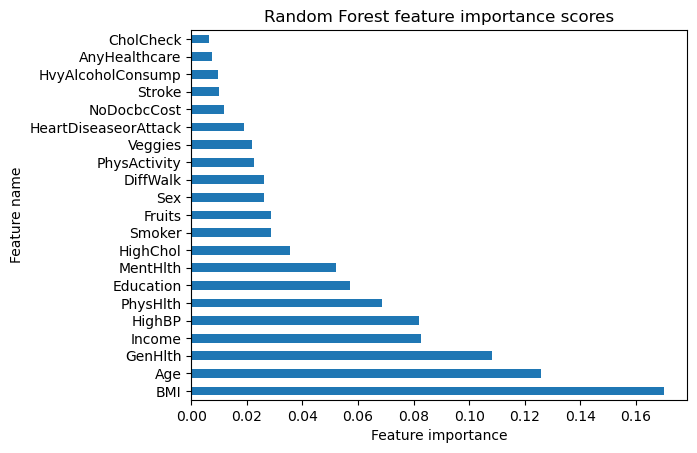

In [18]:
# Random Forest feature importance scores
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False, inplace=True) #sort importance
feat_importances.plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Random Forest feature importance scores')
plt.show()
